# !----- Data Preperation -----!

Code adapted and copied from codebasics github repository : https://github.com/codebasics/py/tree/master/DeepLearningML

In [1]:
# Using OS library to load our image folder 

import os

train_folder_path = "train_images"
val_folder_path = "test_images"


# Listing all files in the folder
file_list_train = os.listdir(train_folder_path)
file_list_val = os.listdir(val_folder_path)


# Printing the list of files
print(file_list_train)
print(file_list_val)



['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']
['200001.jpg', '200002.jpg', '200003.jpg', '200004.jpg', '200005.jpg', '200006.jpg', '200007.jpg', '200008.jpg', '200009.jpg', '200010.jpg', '200011.jpg', '200012.jpg', '200013.jpg', '200014.jpg', '200015.jpg', '200016.jpg', '200017.jpg', '200018.jpg', '200019.jpg', '200020.jpg', '200021.jpg', '200022.jpg', '200023.jpg', '200024.jpg', '200025.jpg', '200026.jpg', '200027.jpg', '200028.jpg', '200029.jpg', '200030.jpg', '200031.jpg', '200032.jpg', '200033.jpg', '200034.jpg', '200035.jpg', '200036.jpg', '200037.jpg', '200038.jpg', '200039.jpg', '200040.jpg', '200041.jpg', '200042.jpg', '200043.jpg', '200044.jpg', '200045.jpg', '200046.jpg', '200047.jpg', '200048.jpg', '200049.jpg', '200050.jpg', '200051.jpg', '200052.jpg', '200053.jpg', '200054.jpg', '200055.jpg', '200056.jpg', '200057.jpg', '200058.jpg', '200059.jpg', '200060.jpg'

In [3]:
# All oother libraries we use further

import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import pathlib
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential


#loading our path to variable data dir for operations on image, 
train_data_dir = pathlib.Path(train_folder_path)
#val_data_dir = pathlib.Path(val_folder_path)


print(train_data_dir)
#print(val_data_dir)

train_images


# !----- Data Analysis -----!

Some of the Data Analysis code adapted from codebasics github repository : https://github.com/codebasics/py/tree/master/DeepLearningML

# Checking the image count

In [4]:
import random

train_image_count = len(list(train_data_dir.glob('*/*.jpg')))
#val_image_count = len(list(val_data_dir.glob('*/*.jpeg')))


print("Training Image Count : ", train_image_count)
#print("Validation Image Count : ", val_image_count)


Training Image Count :  10407


# Checking no of samples for each class in training data 


In [5]:
bacterial_leaf_blight = list(train_data_dir.glob('bacterial_leaf_blight/*'))
bacterial_leaf_streak = list(train_data_dir.glob('bacterial_leaf_streak/*'))
bacterial_panicle_blight = list(train_data_dir.glob('bacterial_panicle_blight/*'))
blast = list(train_data_dir.glob('blast/*'))
brown_spot = list(train_data_dir.glob('brown_spot/*'))
dead_heart = list(train_data_dir.glob('dead_heart/*'))
downy_mildew = list(train_data_dir.glob('downy_mildew/*'))
hispa = list(train_data_dir.glob('hispa/*'))
normal = list(train_data_dir.glob('normal/*'))
tungro = list(train_data_dir.glob('tungro/*'))

print(f"bacterial_leaf_blight len: {len(bacterial_leaf_blight)}")
print(f"bacterial_leaf_streak len: {len(bacterial_leaf_streak)}")
print(f"bacterial_panicle_blight len: {len(bacterial_panicle_blight)}")
print(f"blast len: {len(blast)}")
print(f"brown_spot len: {len(brown_spot)}")
print(f"dead_heart len: {len(dead_heart)}")
print(f"downy_mildew len: {len(downy_mildew)}")
print(f"hispa len: {len(hispa)}")
print(f"normal len: {len(normal)}")
print(f"tungro len: {len(tungro)}")


bacterial_leaf_blight len: 479
bacterial_leaf_streak len: 380
bacterial_panicle_blight len: 337
blast len: 1738
brown_spot len: 965
dead_heart len: 1442
downy_mildew len: 620
hispa len: 1594
normal len: 1764
tungro len: 1088


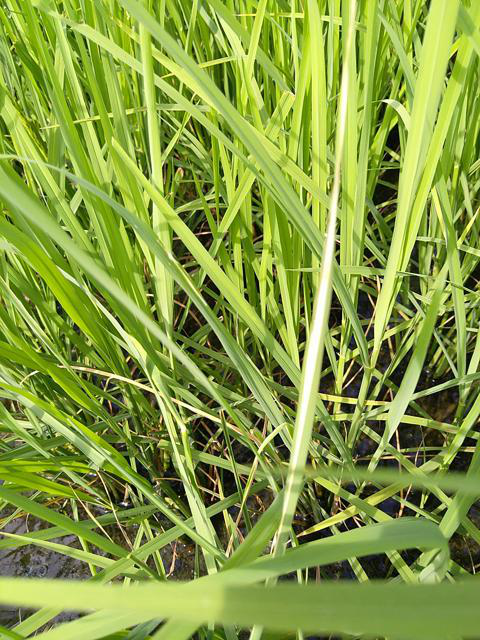

In [11]:
# Chcking one image from tra

PIL.Image.open(str(bacterial_leaf_blight[0]))

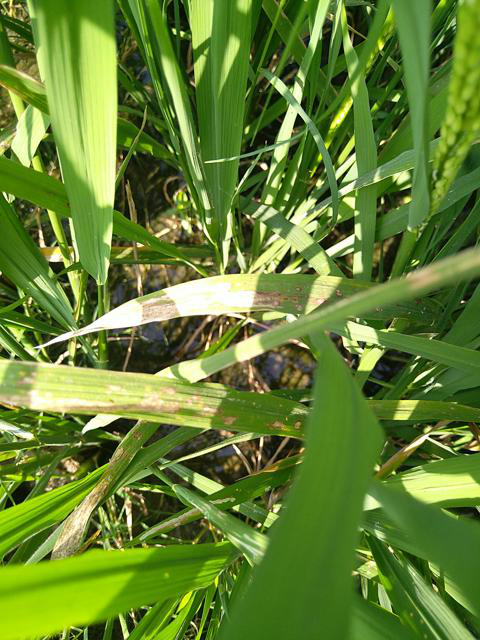

In [13]:
PIL.Image.open(str(bacterial_leaf_streak[0]))

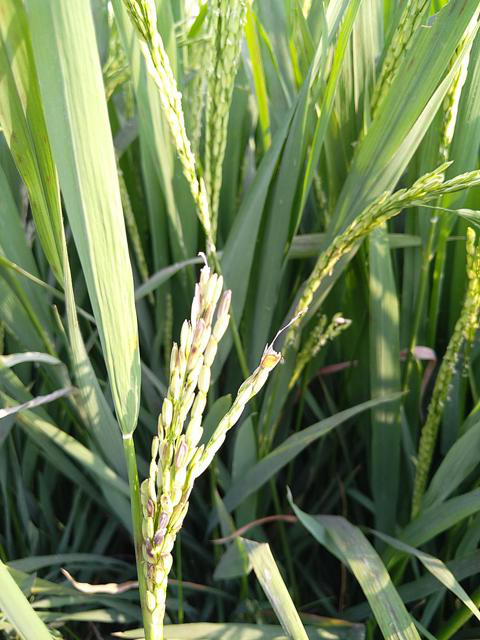

In [15]:
PIL.Image.open(str(bacterial_panicle_blight[0]))

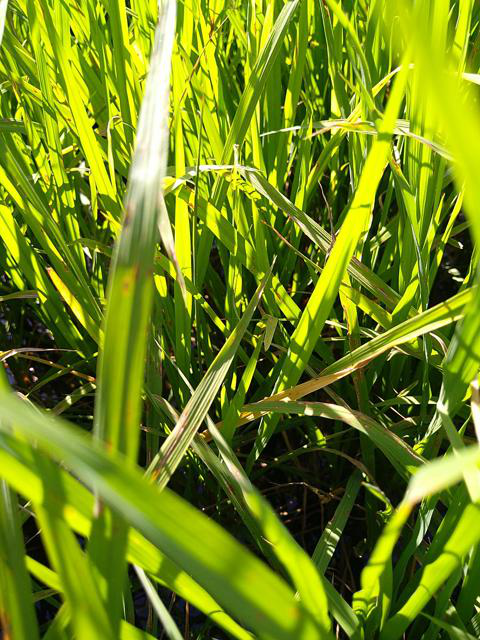

In [17]:
PIL.Image.open(str(blast[0]))

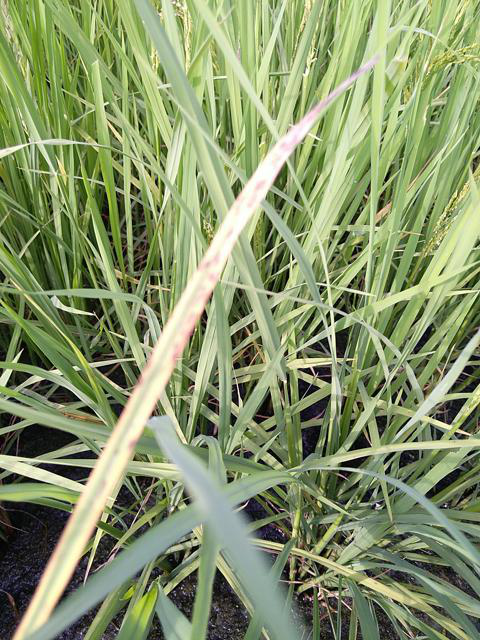

In [19]:
PIL.Image.open(str(brown_spot[0]))

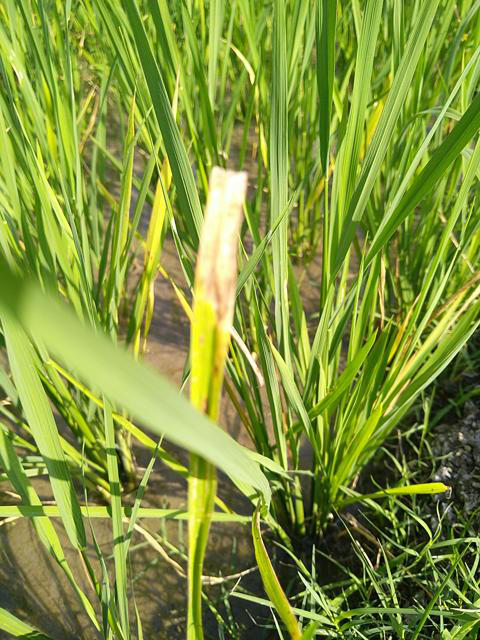

In [21]:
PIL.Image.open(str(downy_mildew[0]))

# !----- Data Pre-processing -----!

Some of the Code adapted copied from codebasics github repository : https://github.com/codebasics/py/tree/master/DeepLearningML

# Labelling images

In [6]:
# Image Dict
image_dict = {
    'bacterial_leaf_blight_images': list(bacterial_leaf_blight),
    'bacterial_leaf_streak_images': list(bacterial_leaf_streak),
    'bacterial_panicle_blight_images': list(bacterial_panicle_blight),
    'blast_images': list(blast),
    'brown_spot_images': list(brown_spot),
    'dead_heart_images': list(dead_heart),
    'downy_mildew_images': list(downy_mildew),
    'hispa_images': list(hispa),
    'normal_images': list(normal),
    'tungro_images': list(tungro)
}

# Label Dict
label_dict = {
    'bacterial_leaf_blight_images': 0,
    'bacterial_leaf_streak_images': 1,
    'bacterial_panicle_blight_images': 2,
    'blast_images': 3,
    'brown_spot_images': 4,
    'dead_heart_images': 5,
    'downy_mildew_images': 6,
    'hispa_images': 7,
    'normal_images': 8,
    'tungro_images': 9
}


In [25]:
#Checking Image shape

img = cv2.imread(str(image_dict['tungro_images'][0]))
img.shape

(640, 480, 3)

# Balancing the image dictionary to reduce the training time 

In [57]:
image_dict['tungro_images'][0]

WindowsPath('train_images/tungro/100011.jpg')

In [7]:
import random


min_images = 337

# Balance the dataset by sampling `min_images` from each category
balanced_image_dict = {
    category: random.sample(images, min_images) for category, images in image_dict.items()
}

# Print new balanced dataset sizes
for category, images in balanced_image_dict.items():
    print(f"{category} len: {len(images)}")

bacterial_leaf_blight_images len: 337
bacterial_leaf_streak_images len: 337
bacterial_panicle_blight_images len: 337
blast_images len: 337
brown_spot_images len: 337
dead_heart_images len: 337
downy_mildew_images len: 337
hispa_images len: 337
normal_images len: 337
tungro_images len: 337


In [59]:
balanced_image_dict['tungro_images'][0]

WindowsPath('train_images/tungro/105117.jpg')

# Resizing images to constant 300*300 

In [8]:
import cv2
import numpy as np

X = []
y = []

for file_name, images in balanced_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))

        if img is None:
            print(f"Warning: Could not read image {image}")  # Debugging message
            continue  # Skip this image
        
        try:
            resized_image = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
            X.append(resized_image)
            y.append(label_dict[file_name])  # Fixed typo from `lable_dict`
        except Exception as e:
            print(f"Error resizing image {image}: {e}")  # Debugging message
            continue  # Skip this image


In [65]:
len(X)

3370

In [67]:
len(y)

3370

In [69]:
print('Shape of the image after resizing : ', X[0].shape)

Shape of the image after resizing :  (224, 224, 3)


# converting our X and y to array for train test split

In [15]:
X_np_arr = np.array(X)
y_np_arr = np.array(y)

In [73]:
X_np_arr.shape

(3370, 224, 224, 3)

In [75]:
y_np_arr.shape

(3370,)

# Splitting our dataset into training and testing

In [17]:
# train test split our data, splitting 20% data as a testing and 80% for training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_np_arr, y_np_arr, test_size=0.2, random_state=0)

# sclaing our image vector data for better accuracy

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_train_scaled.shape

(2696, 224, 224, 3)

In [83]:
y_train.shape

(2696,)

In [85]:
X_train_scaled

array([[[[0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.98431373, 0.99607843, 0.98823529],
         [0.98039216, 0.98823529, 0.98431373]],

        [[0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         ...,
         [0.94901961, 0.96078431, 0.95294118],
         [0.9372549 , 0.94901961, 0.94117647],
         [0.97647059, 0.98823529, 0.98039216]],

        [[0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         [0.98823529, 1.        , 0.99215686],
         ...,
         [0.75686275, 0.76862745, 0.76078431],
         [0.90588235, 0.91764706, 0.90980392],
         [0.98039216, 0.98823529, 0.98431373]],

        ...,

        [[0.07843137, 0.27843137, 0.23529412],
         [0.11764706, 0.34509804, 0.30196078]

# !----- Model Training and Evaluation - Simple CNN -----!

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout



# Model 1: Simple Convolutional Neural Network (CNN)
This model 1 code is adopted from : https://github.com/codebasics/py/tree/master/DeepLearningML

In [22]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Fitting
history_cnn = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1441 - loss: 4.6313 - val_accuracy: 0.2774 - val_loss: 2.0806
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 983ms/step - accuracy: 0.4264 - loss: 1.7628 - val_accuracy: 0.4985 - val_loss: 1.5803
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7112 - loss: 0.9344 - val_accuracy: 0.4837 - val_loss: 1.7999
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 967ms/step - accuracy: 0.9220 - loss: 0.3063 - val_accuracy: 0.5682 - val_loss: 1.7208
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 960ms/step - accuracy: 0.9832 - loss: 0.0928 - val_accuracy: 0.5831 - val_loss: 1.8164
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 968ms/step - accuracy: 0.9954 - loss: 0.0286 - val_accuracy: 0.5950 - val_loss: 2.1161
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 967ms/step - accuracy: 0.9995 - loss: 0.0046 - val_accuracy: 0.5905 - val_loss: 2.3098
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 977ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.6061 - loss: 2.7153
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step
Classification Report - Simple CNN:
               precision    recall  f1-score   support

           0       0.61      0.51      0.56        69
           1       0.86      0.83      0.85        76
           2       0.69      0.73      0.71        66
           3       0.54      0.52      0.53        61
           4       0.54      0.61      0.57        69
           5       0.48      0.58      0.53        62
           6       0.64      0.61      0.63        59
           7       0.46      0.49      0.48        65
           8       0.57      0.57      0.57        75
           9       0.58      0.50      0.54        72

    accuracy                           0.60       674
   macro avg       0.60      0.60      0.60       674
weighted avg       0.60      0.60      0.60       674



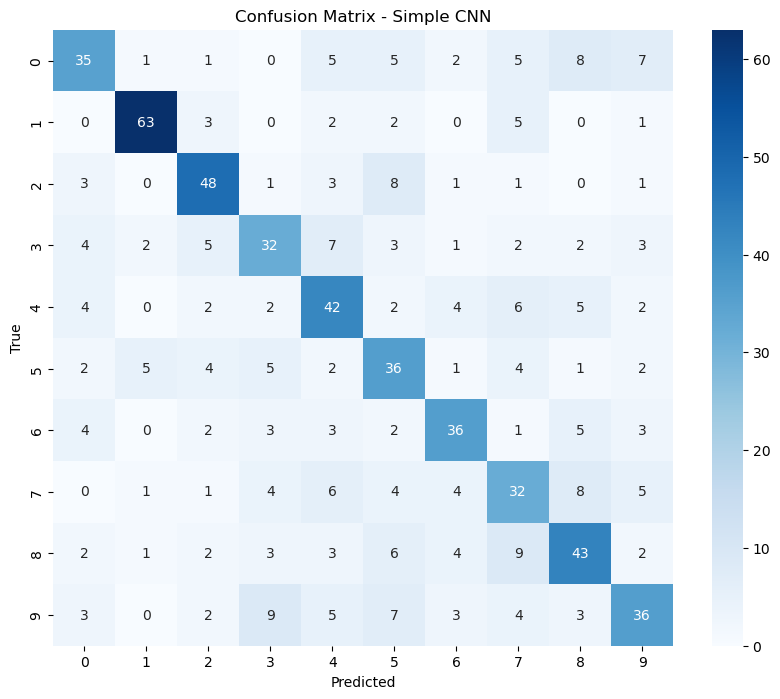

In [35]:
#by evaluating the model we can see that their is a overfitting issue
model1.evaluate(X_test_scaled, y_test)


# Makeing predictions on the test set
y_pred_1 = model1.predict(X_test_scaled)
y_pred_model1 = np.argmax(y_pred_1, axis=1)


# Printing classification report
print("Classification Report - Simple CNN:\n", classification_report(y_test, y_pred_model1))


# Generating and plotting the confusion matrix
unique_classes = np.unique(y_train)
conf_mat = confusion_matrix(y_test, y_pred_model1)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix - Simple CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

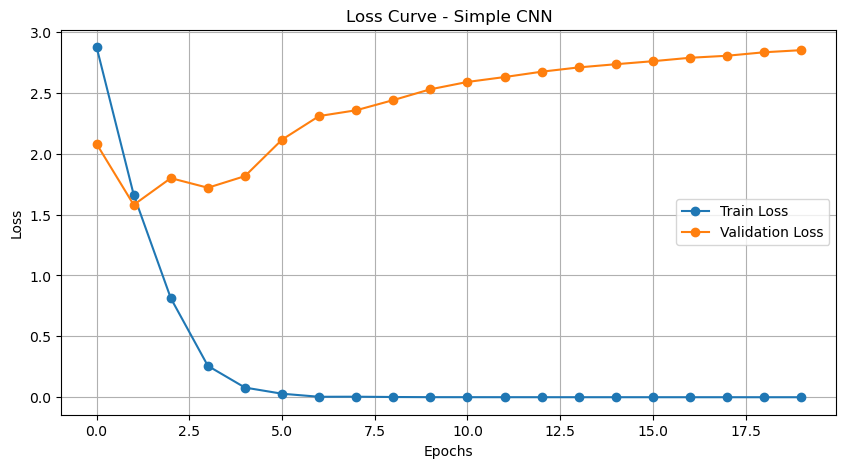

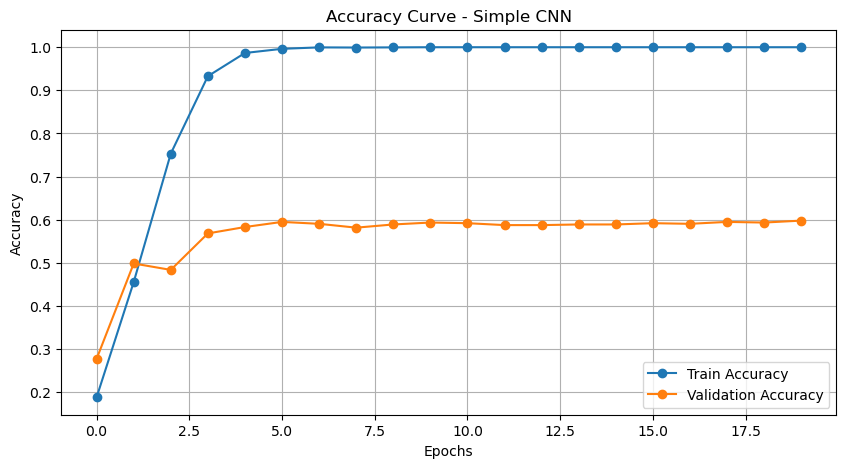

In [39]:
# ---------------------------- Plot Training History ----------------------------
# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['loss'], label='Train Loss', marker='o')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve - Simple CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve - Simple CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [41]:
# Save model
model1.save("rice_disease_model_simplecnn_20.h5")

# Model 2: Transfer Learning with VGG16

In [43]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [45]:
for layer in base_model.layers:
    layer.trainable = False

X = Flatten()(base_model.output)
X = Dense(256, activation='relu')(X)

predictions = Dense(10, activation='softmax')(X)

In [46]:
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

model_vgg16.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [49]:
history_vgg16 = model_vgg16.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 719s 8s/step - accuracy: 0.2775 - loss: 3.0578 - val_accuracy: 0.5964 - val_loss: 1.2302
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 730s 9s/step - accuracy: 0.7650 - loss: 0.7611 - val_accuracy: 0.7567 - val_loss: 0.8754
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 761s 9s/step - accuracy: 0.9190 - loss: 0.3715 - val_accuracy: 0.7611 - val_loss: 0.7638
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 763s 9s/step - accuracy: 0.9592 - loss: 0.2177 - val_accuracy: 0.7774 - val_loss: 0.7755
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 743s 9s/step - accuracy: 0.9778 - loss: 0.1260 - val_accuracy: 0.8131 - val_loss: 0.6433
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 727s 9s/step - accuracy: 0.9968 - loss: 0.0705 - val_accuracy: 0.8145 - val_loss: 0.6493
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 732s 9s/step - accuracy: 0.9990 - loss: 0.0428 - val_accuracy: 0.7923 - val_loss: 0.6420
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 745s 9s/step - accuracy: 0.9988 - loss: 0.0306 - val_accuracy: 0.8220 - v

22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8317 - loss: 0.5805
22/22 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step
Classification Report - VGG16:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        69
           1       0.97      0.99      0.98        76
           2       0.89      0.94      0.91        66
           3       0.80      0.77      0.78        61
           4       0.76      0.86      0.80        69
           5       0.83      0.73      0.78        62
           6       0.79      0.90      0.84        59
           7       0.77      0.66      0.71        65
           8       0.77      0.80      0.78        75
           9       0.90      0.74      0.81        72

    accuracy                           0.83       674
   macro avg       0.83      0.82      0.82       674
weighted avg       0.83      0.83      0.82       674



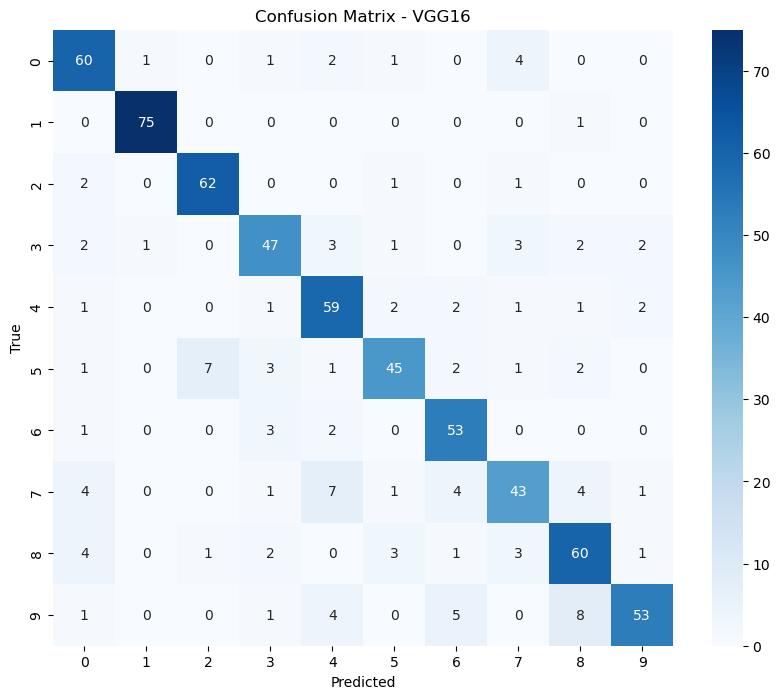

In [51]:
model_vgg16.evaluate(X_test_scaled, y_test)


# Makeing predictions on the test set`
y_pred_vgg16 = model_vgg16.predict(X_test_scaled)
y_pred_model_vgg16 = np.argmax(y_pred_vgg16, axis=1)


# Printing classification report
print("Classification Report - VGG16:\n", classification_report(y_test, y_pred_model_vgg16))


# Generating and plotting the confusion matrix
unique_classes = np.unique(y_train)
conf_mat_vgg16 = confusion_matrix(y_test, y_pred_model_vgg16)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

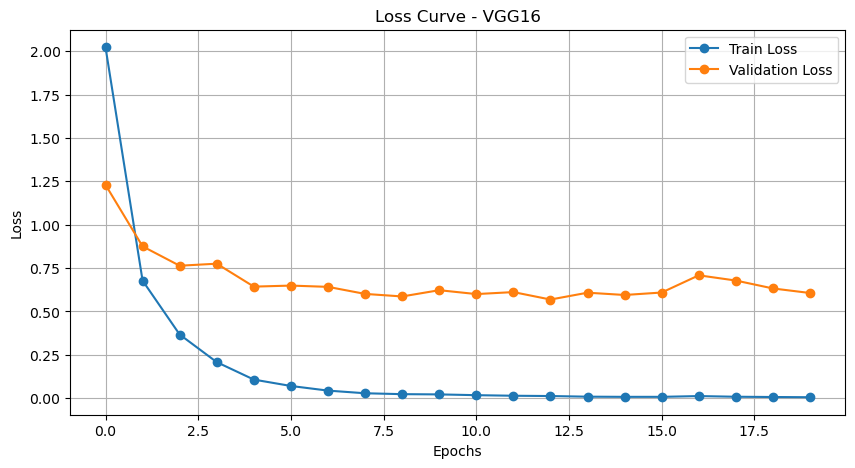

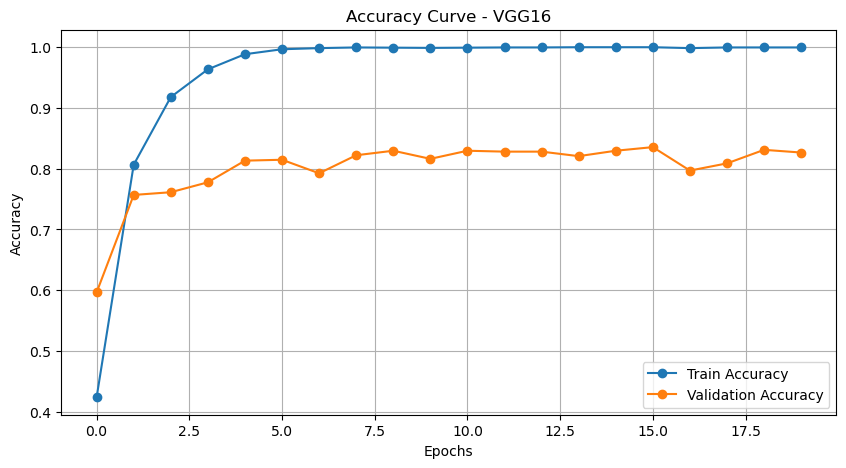

In [53]:
# ---------------------------- Plot Training History ----------------------------
# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['loss'], label='Train Loss', marker='o')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Save model
model_vgg16.save("saved_models/rice_disease_model_vgg16_20.h5")

# VGG19 Model

In [23]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model


# initialize vgg19 model 
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# selecting only base layers 
for layer in base_model_vgg19.layers:
    layer.trainable = False

X_vgg19 = Flatten()(base_model_vgg19.output)
X_vgg19 = Dense(256, activation='relu')(X_vgg19)

predictions_vgg19 = Dense(10, activation='softmax')(X_vgg19)


# compiling vgg19 model with base layers 
model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=predictions_vgg19)

model_vgg19.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [25]:
history_vgg19 = model_vgg19.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 980s 11s/step - accuracy: 0.2373 - loss: 3.8275 - val_accuracy: 0.5593 - val_loss: 1.3913
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 961s 11s/step - accuracy: 0.6525 - loss: 1.1587 - val_accuracy: 0.6128 - val_loss: 1.1349
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 959s 11s/step - accuracy: 0.8212 - loss: 0.7276 - val_accuracy: 0.7122 - val_loss: 0.9321
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 964s 11s/step - accuracy: 0.8885 - loss: 0.4956 - val_accuracy: 0.7626 - val_loss: 0.7596
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 953s 11s/step - accuracy: 0.9418 - loss: 0.3137 - val_accuracy: 0.7611 - val_loss: 0.7522
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 941s 11s/step - accuracy: 0.9661 - loss: 0.2202 - val_accuracy: 0.8131 - val_loss: 0.6413
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 939s 11s/step - accuracy: 0.9773 - loss: 0.1556 - val_accuracy: 0.8027 - val_loss: 0.6581
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 940s 11s/step - accuracy: 0.9927 - loss: 0.1146 - val_accuracy: 0.

22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.8334 - loss: 0.5933
22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step
Classification Report - VGG19:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        69
           1       0.91      0.97      0.94        76
           2       0.84      0.95      0.89        66
           3       0.72      0.77      0.75        61
           4       0.90      0.78      0.84        69
           5       0.81      0.77      0.79        62
           6       0.78      0.86      0.82        59
           7       0.76      0.78      0.77        65
           8       0.85      0.84      0.85        75
           9       0.83      0.75      0.79        72

    accuracy                           0.83       674
   macro avg       0.83      0.83      0.83       674
weighted avg       0.84      0.83      0.83       674



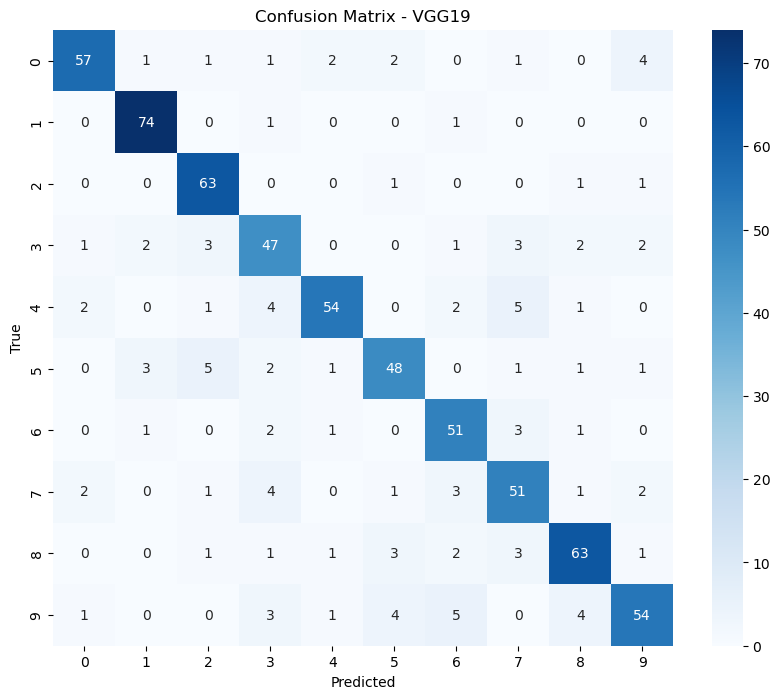

In [51]:
model_vgg19.evaluate(X_test_scaled, y_test)


# Makeing predictions on the test set
y_pred_vgg19 = model_vgg19.predict(X_test_scaled)
y_pred_model_vgg19 = np.argmax(y_pred_vgg19, axis=1)


# Printing classification report
print("Classification Report - VGG19:\n", classification_report(y_test, y_pred_model_vgg19))


# Generating and plotting the confusion matrix
unique_classes = np.unique(y_train)
conf_mat_vgg19 = confusion_matrix(y_test, y_pred_model_vgg19)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_vgg19, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix - VGG19')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

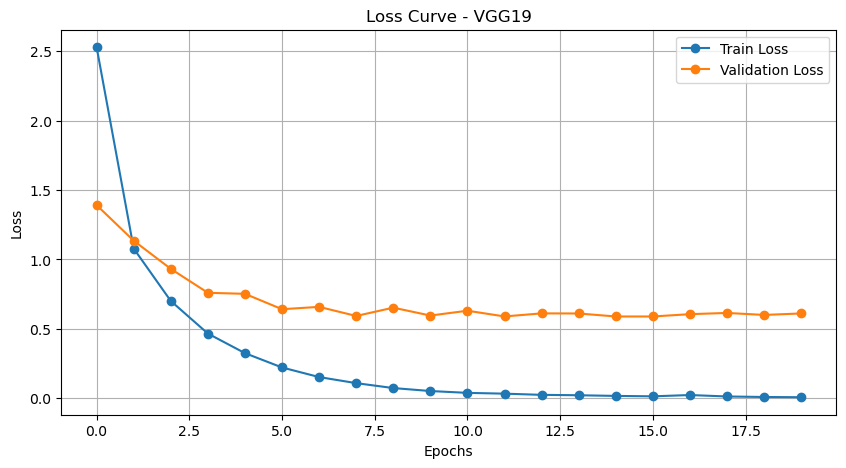

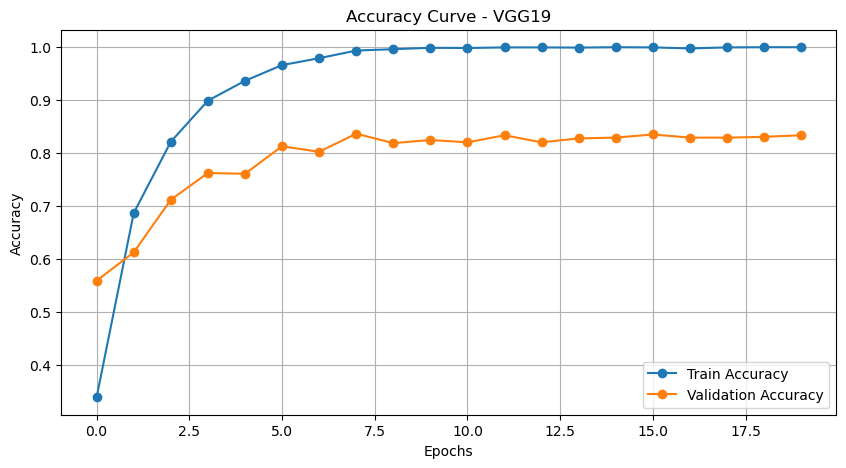

In [52]:
# ---------------------------- Plot Training History ----------------------------
# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_vgg19.history['loss'], label='Train Loss', marker='o')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve - VGG19')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_vgg19.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve - VGG19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [53]:
# Save model
model_vgg19.save("rice_disease_model_vgg19_20.h5")

In [66]:
# !!!-------------------- Model Training and Evaluation ---------------------------!!! 
# ---------------------------- ResNet50 Model ---------------------------
from keras._tf_keras.keras.applications import ResNet50, ResNet50V2
from tensorflow.keras.models import Model


base_model_resnet50v2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_resnet50v2.layers:
    layer.trainable = False


X_resnet50v2 = Flatten()(base_model_resnet50v2.output)
X_resnet50v2 = Dense(256, activation='relu')(X_resnet50v2)

predictions_resnet50v2 = Dense(10, activation='softmax')(X_resnet50v2)


model_resnet50v2 = Model(inputs=base_model_resnet50v2.input, outputs=predictions_resnet50v2)
model_resnet50v2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])



In [67]:
history_resnet50v2 = model_resnet50v2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.3082 - loss: 10.8205 - val_accuracy: 0.6869 - val_loss: 1.0416
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8754 - loss: 0.4113 - val_accuracy: 0.7255 - val_loss: 0.8716
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.9777 - loss: 0.1314 - val_accuracy: 0.7493 - val_loss: 0.9527
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9946 - loss: 0.0525 - val_accuracy: 0.7923 - val_loss: 0.8199
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9997 - loss: 0.0185 - val_accuracy: 0.7923 - val_loss: 0.7948
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.7967 - val_loss: 0.8179
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.7953 - val_loss: 0.8246
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.7878 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7755 - loss: 0.8929
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step
Classification Report - Resnet50v2:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        69
           1       0.90      0.91      0.90        76
           2       0.84      0.92      0.88        66
           3       0.64      0.74      0.69        61
           4       0.68      0.75      0.71        69
           5       0.88      0.74      0.81        62
           6       0.87      0.81      0.84        59
           7       0.73      0.71      0.72        65
           8       0.82      0.84      0.83        75
           9       0.83      0.72      0.77        72

    accuracy                           0.80       674
   macro avg       0.80      0.79      0.80       674
weighted avg       0.80      0.80      0.80       674



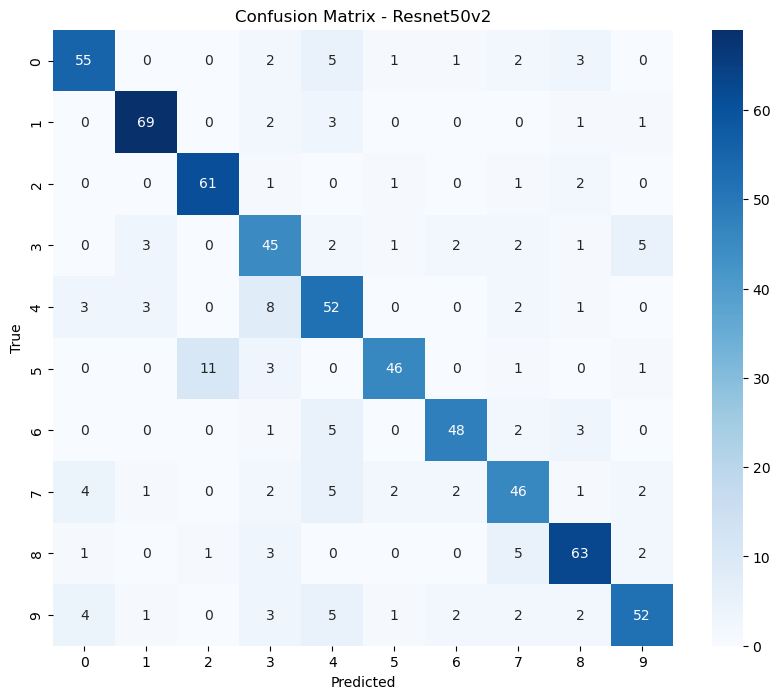

In [70]:
model_resnet50v2.evaluate(X_test_scaled, y_test)


# Makeing predictions on the test set
y_pred_resnet50v2 = model_resnet50v2.predict(X_test_scaled)
y_pred_model_resnet50v2 = np.argmax(y_pred_resnet50v2, axis=1)


# Printing classification report
print("Classification Report - Resnet50v2:\n", classification_report(y_test, y_pred_model_resnet50v2))


# Generating and plotting the confusion matrix
unique_classes = np.unique(y_train)
conf_mat_resnet50v2 = confusion_matrix(y_test, y_pred_model_resnet50v2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_resnet50v2, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix - Resnet50v2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



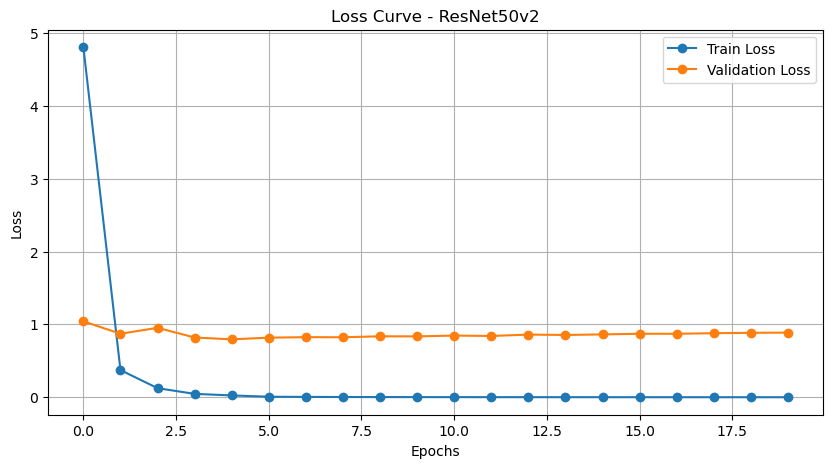

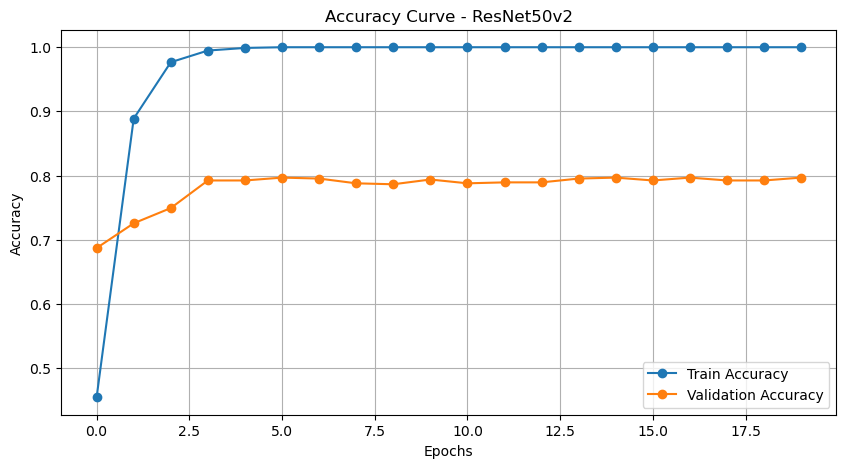

In [72]:
# ---------------------------- Plot Training History ----------------------------
# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_resnet50v2.history['loss'], label='Train Loss', marker='o')
plt.plot(history_resnet50v2.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve - ResNet50v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_resnet50v2.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_resnet50v2.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve - ResNet50v2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [74]:
# Saving the model in HDF5 format
model_resnet50.save('resnet50v2_model_20.h5')